$$ ITI \space AI-Pro: \space Intake \space 45 $$
$$ Machine \space Learning \space 1 $$
$$ Obesity Risk  $$

# `01` Introduction

<img src="https://media3.giphy.com/media/nrTjHntgyF7OM/200.webp?cid=ecf05e47tgzu90f5bwpzzxfun0zg4kefnpsc3tpu3qn17963&ep=v1_gifs_search&rid=200.webp&ct=g" width="100%" height="100%">


---
- The dataset for this competition (both train and test) was generated from a deep learning model trained on the `Obesity` or `CVD risk` dataset.
- Feature distributions are close to, but not exactly the same, as the original.
- Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

`Note`: This dataset is particularly well suited for visualizations, clustering, and general EDA. <br>
`Our Goal`: The goal of this competition is to use various factors to predict obesity risk in individuals, which is related to cardiovascular disease.

---

# `02` Data Set Overview 🔍

## `#` About Data:

The [Obesity or CVD risk dataset](https://www.kaggle.com/competitions/playground-series-s4e2/data) contains 14,530 rows and 17 columns.  


The columns are as follows :  

- **ID**: Unique identifier for each entry.  
- **Gender**: The biological sex of the individual (Male/Female).  
- **Age**: The age of the individual in years.  
- **Height**: The height of the individual in meters.  
- **Weight**: The weight of the individual in kilograms.  
- **family_history_with_overweight**: Indicates whether the individual has a family history of overweight (Yes/No).  
- **FAVC**: Indicates whether the individual frequently consumes high-calorie food (Yes/No).  
- **FCVC**: The frequency of vegetable consumption, on a scale from 1 (low) to 3 (high).  
- **NCP**: The number of main meals consumed per day.  
- **CAEC**: Frequency of eating between meals (Never, Sometimes, Frequently, Always).  
- **SMOKE**: Indicates whether the individual smokes (Yes/No).  
- **CH2O**: Daily water intake in liters.  
- **SCC**: Indicates whether the individual has a history of calorie consumption monitoring (Yes/No).  
- **FAF**: Physical activity frequency per week, on a scale from 0 (none) to 3 (high).  
- **TUE**: The time spent using electronic devices per day, on a scale from 0 (low) to 2 (high).  
- **CALC**: Frequency of alcohol consumption (Never, Sometimes, Frequently, Always).  
- **MTRANS**: The main mode of transportation used (e.g., Public_Transportation, Walking, Automobile, etc.).  

This dataset will help researchers understand lifestyle factors contributing to overweight and obesity and aid in building predictive models for health risk assessment.

---
## `#` Questions:
### <u>General Questions :</u>

- 1- Are there any missing values in our dataset?
- 2- Are there any duplicated values in our dataset?
- 3- What is the numerical description of our dataset?
- 4- What is the categorical description of our dataset?
- 5- What is the number of unique values in each column in our dataset?
- 6- Initial Data Assessment.
- 7- what is the distribution of each numerical columns?
- 8- what is the count of each categorical column?
- 9- Is there outliers in our data?

---
# `03` Import Necessary Libraries 📖

## `i` Default Libraries

In [303]:
import pandas as pd
import numpy as np

## `ii` Additional Libraries

In [304]:
# from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder ,LabelEncoder
from sklearn.linear_model import LogisticRegression , SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

pd.set_option('display.max_columns', None)

import warnings
warnings.simplefilter("ignore")

----------------------------

# `04` Load Data

In [305]:
data = pd.read_csv('/content/train.csv')

In [306]:
data.head().style.background_gradient(cmap='Oranges')

---
## `#` Create Test Set

In [307]:
x = data.drop(columns=['NObeyesdad','id'],axis=1)
y = data['NObeyesdad']

np.random.seed(42)

x_ , x_test ,y_, y_test = train_test_split(x,y ,stratify=y,test_size=0.15)
x_train, x_valid , y_train , y_valid = train_test_split(x_,y_,test_size=0.15/0.85)

----------------

# `05` Exploratory Data Analysis (EDA)

## `i` Simple Analysis

In [308]:
# Do not forget to change column names

In [309]:
x_train.head().style.background_gradient(cmap='Oranges')

In [310]:
x_train.shape

(14530, 16)

In [311]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14530 entries, 3969 to 10741
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          14530 non-null  object 
 1   Age                             14530 non-null  float64
 2   Height                          14530 non-null  float64
 3   Weight                          14530 non-null  float64
 4   family_history_with_overweight  14530 non-null  object 
 5   FAVC                            14530 non-null  object 
 6   FCVC                            14530 non-null  float64
 7   NCP                             14530 non-null  float64
 8   CAEC                            14530 non-null  object 
 9   SMOKE                           14530 non-null  object 
 10  CH2O                            14530 non-null  float64
 11  SCC                             14530 non-null  object 
 12  FAF                             14

- There are no null data ,and the data types seem to be accurate :)

In [312]:
#Check Missing
x_train.isnull().sum() , y_train.isnull().sum()

(Gender                            0
 Age                               0
 Height                            0
 Weight                            0
 family_history_with_overweight    0
 FAVC                              0
 FCVC                              0
 NCP                               0
 CAEC                              0
 SMOKE                             0
 CH2O                              0
 SCC                               0
 FAF                               0
 TUE                               0
 CALC                              0
 MTRANS                            0
 dtype: int64,
 np.int64(0))

In [313]:
x_train.isna().sum()/x_train.shape[0]*100

Gender                            0.0
Age                               0.0
Height                            0.0
Weight                            0.0
family_history_with_overweight    0.0
FAVC                              0.0
FCVC                              0.0
NCP                               0.0
CAEC                              0.0
SMOKE                             0.0
CH2O                              0.0
SCC                               0.0
FAF                               0.0
TUE                               0.0
CALC                              0.0
MTRANS                            0.0
dtype: float64

- There are no missing values 🎉

In [314]:
#Check duplicates
x_train.duplicated().sum()

np.int64(0)

In [315]:
#check uniqueness
x_train.nunique()

Gender                               2
Age                               1571
Height                            1694
Weight                            1780
family_history_with_overweight       2
FAVC                                 2
FCVC                               859
NCP                                623
CAEC                                 4
SMOKE                                2
CH2O                              1374
SCC                                  2
FAF                               1257
TUE                               1196
CALC                                 3
MTRANS                               5
dtype: int64

---
### Numerical Columns:

In [316]:
x_train.describe(exclude = "object").T.style.background_gradient(cmap='Oranges')

In [317]:
#check skewness
num = x_train.select_dtypes(include = ["float64"])
skewness = num.skew()
print(skewness)

Age       1.514414
Height    0.009695
Weight    0.083107
FCVC     -0.343812
NCP      -1.555153
CH2O     -0.210277
FAF       0.508568
TUE       0.668743
dtype: float64


### Categorical Columns:

In [318]:
x_train.describe(include="object").T.style.background_gradient(cmap='Oranges')

In [319]:
columns_list = ['Gender', 'family_history_with_overweight', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

for col in x_train.columns:
    print(f"Value counts for {col}:")
    print(x_train[col].value_counts())
    print("----------------------------------------------------")

Value counts for Gender:
Gender
Female    7306
Male      7224
Name: count, dtype: int64
----------------------------------------------------
Value counts for Age:
Age
18.000000    1340
26.000000    1285
21.000000    1164
23.000000     834
19.000000     624
             ... 
18.147705       1
20.125401       1
37.716590       1
38.297259       1
19.774317       1
Name: count, Length: 1571, dtype: int64
----------------------------------------------------
Value counts for Height:
Height
1.700000    934
1.650000    555
1.600000    471
1.750000    455
1.800000    371
           ... 
1.662728      1
1.799406      1
1.481682      1
1.669861      1
1.618686      1
Name: count, Length: 1694, dtype: int64
----------------------------------------------------
Value counts for Weight:
Weight
80.000000     589
75.000000     442
50.000000     418
60.000000     342
70.000000     340
             ... 
91.267087       1
135.524857      1
78.726617       1
107.998815      1
75.301029       1
Name: count

---
## `ii` Visual Analysis


 ### <u>Univariate Data Visualizations :</u>

`#` Numerical:

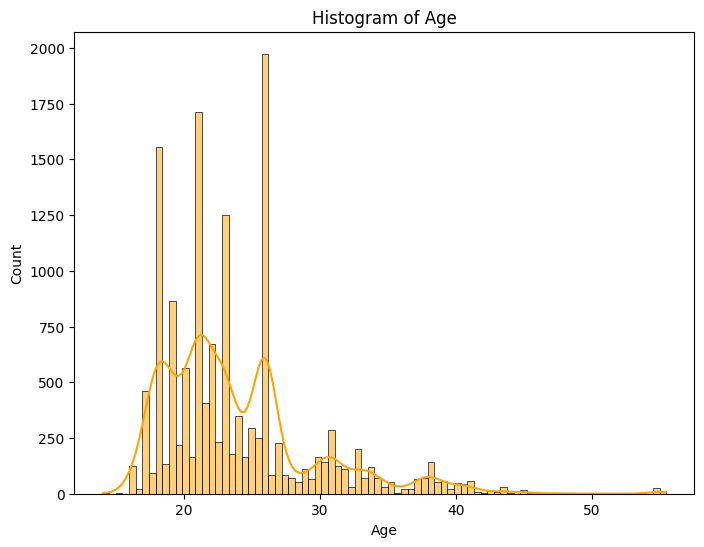

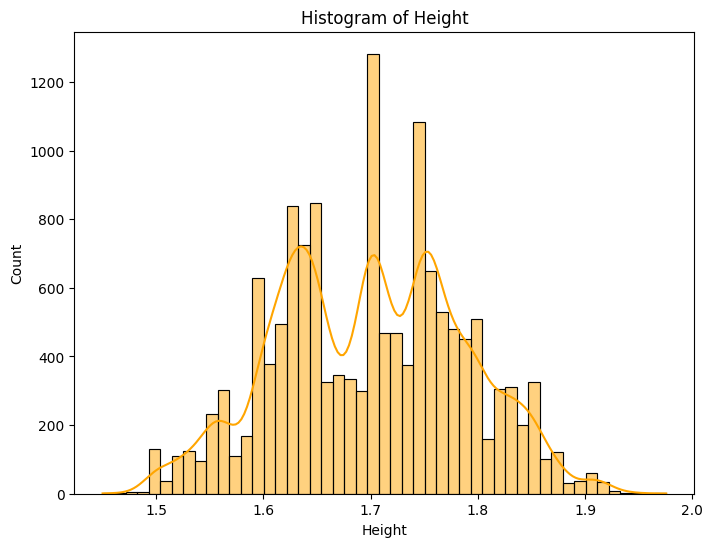

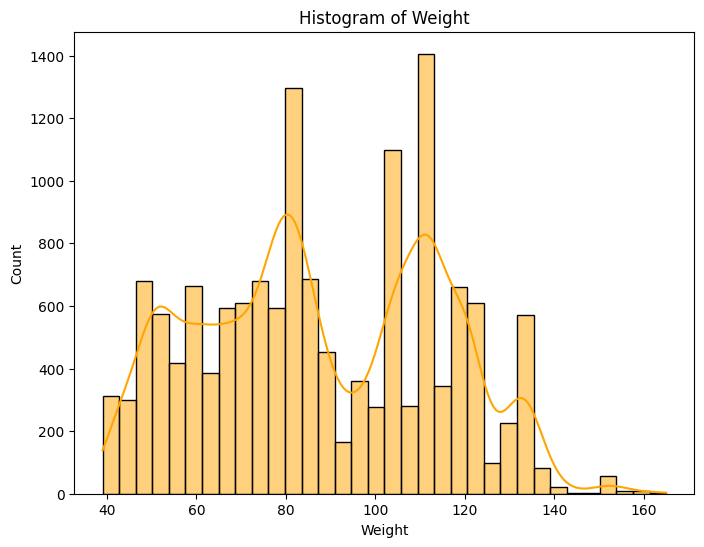

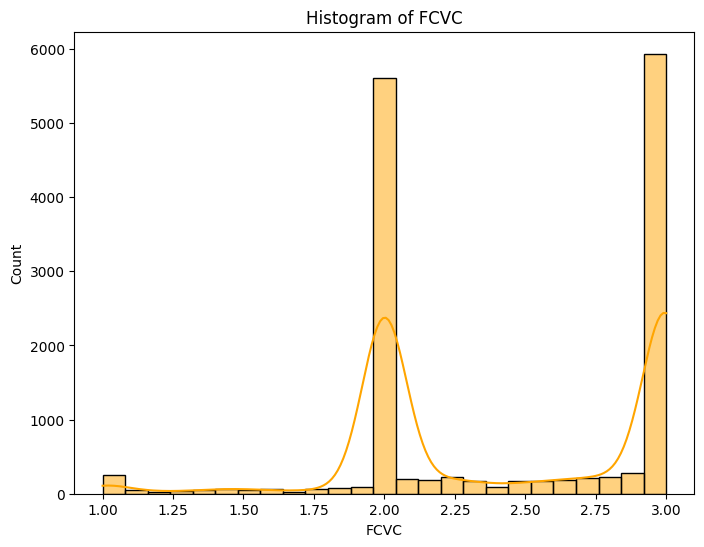

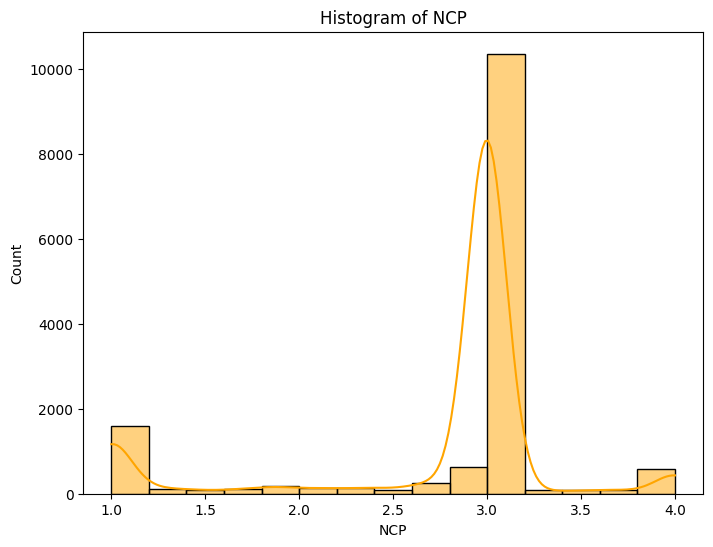

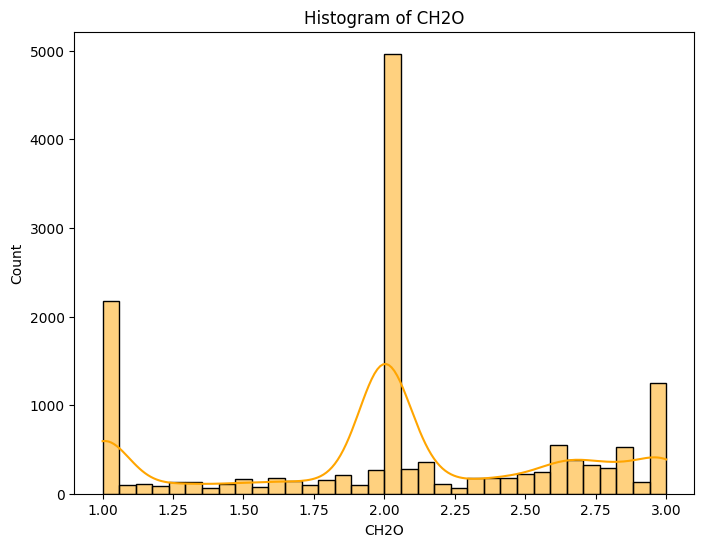

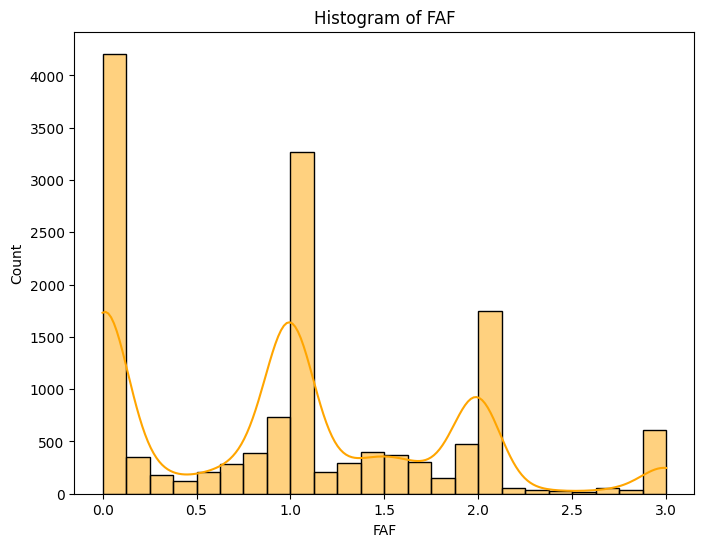

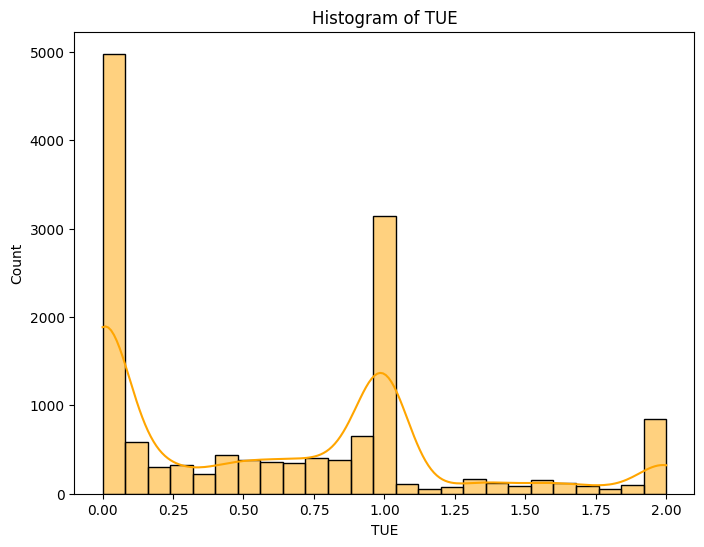

In [320]:
numeric_cols = x_train.select_dtypes(include = ["float64"]).columns

for col in numeric_cols :
    plt.figure(figsize=(8,6))
    sns.histplot(data = x_train , x= col , kde=True , color = 'orange' )
    plt.title(f"Histogram of {col}")
    plt.show()

- **Most ages are concentrated around 20 years old**, indicating that this age group is the most engaged in measuring their weight and health.  
- **Height follows a normal distribution**, which is expected in human populations.  
- **Weight shows a multimodal distribution**, which is natural considering height variations among individuals, as each height group may have a different weight distribution.  


`#` Categorical:

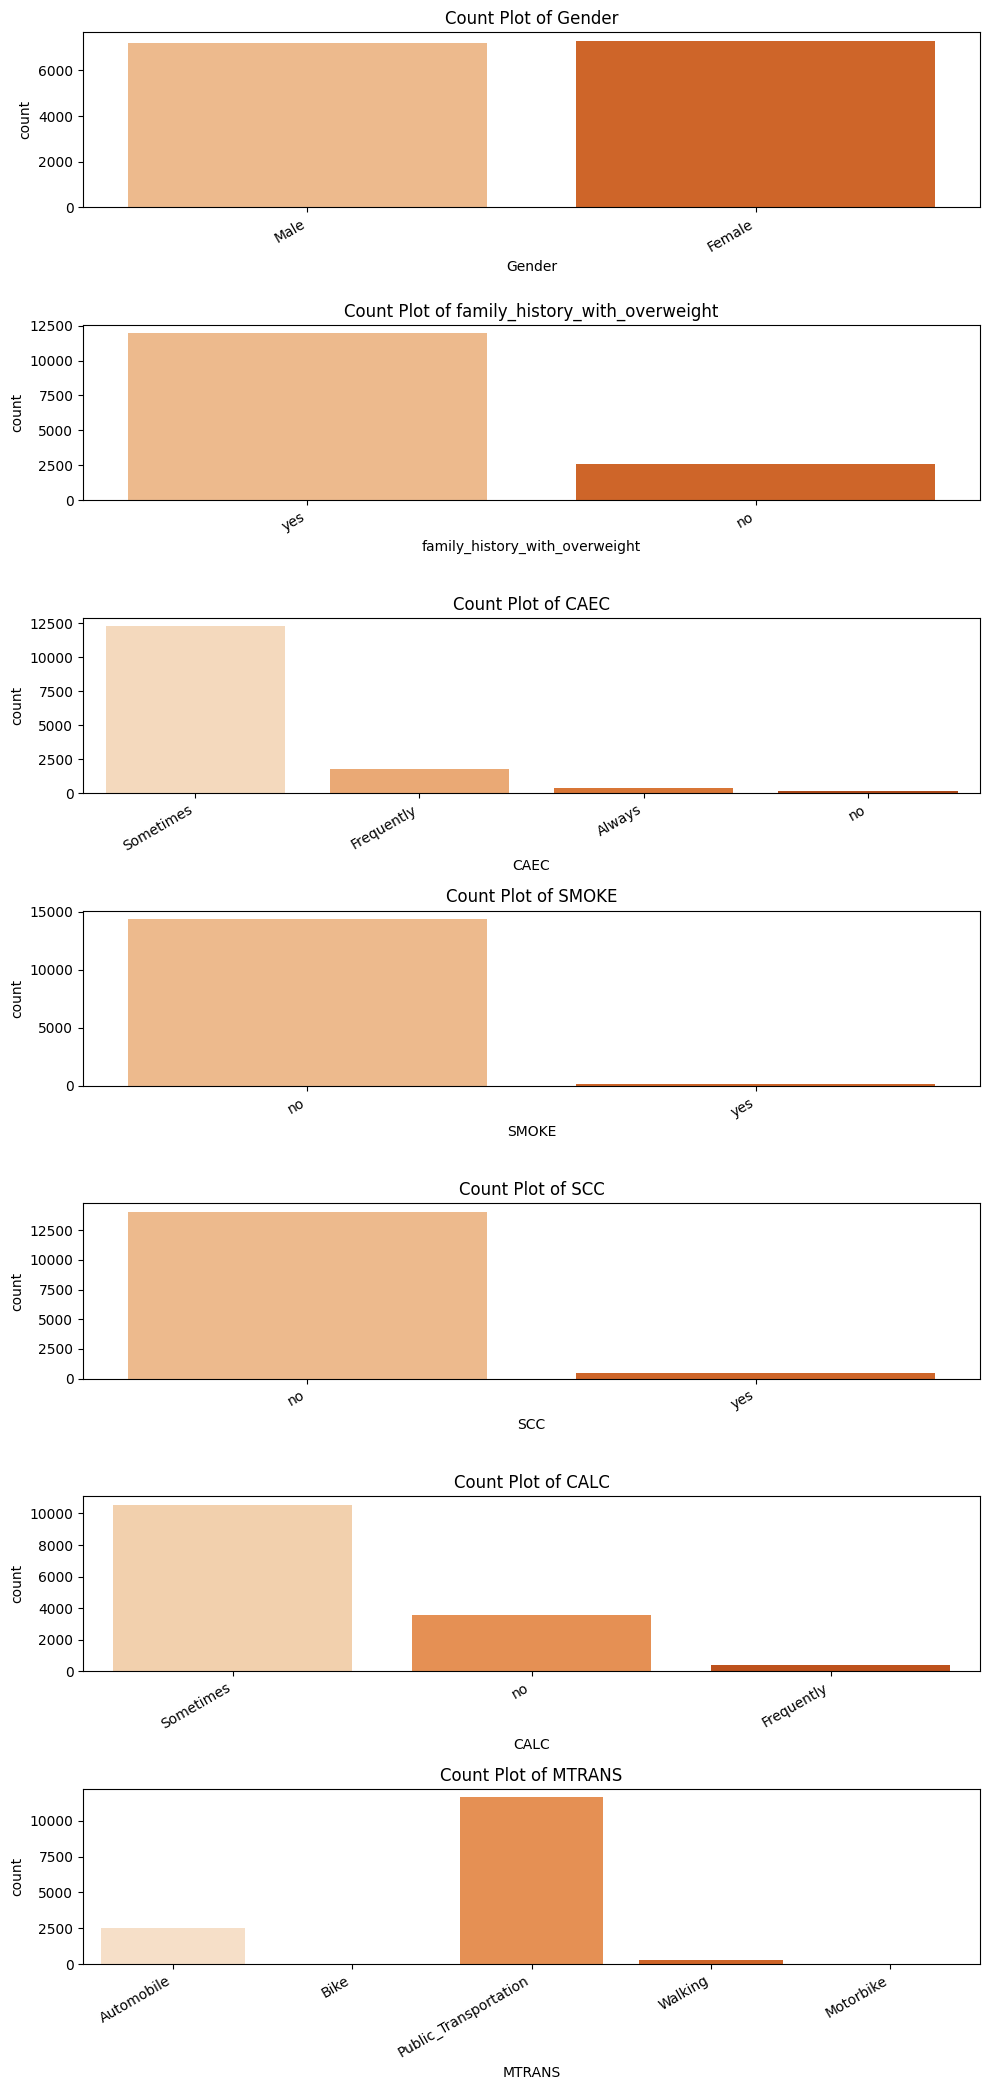

In [321]:
plt.figure(figsize=(10, len(columns_list) * 3))
for i, col in enumerate(columns_list, 1):
    plt.subplot(len(columns_list), 1, i)
    sns.countplot(data=x_train, x=col, palette='Oranges')
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=30, ha='right')

plt.tight_layout()
plt.show()

---
### <u>Check outliers:</u>

In [322]:
numeric_cols = x_train.select_dtypes(include=["number"])

Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_mask = (numeric_cols < lower_bound) | (numeric_cols > upper_bound)

outlier_counts = outliers_mask.sum(axis=0)

total_rows = numeric_cols.shape[0]
outlier_percentage = (outlier_counts / total_rows) * 100

outliers_summary = pd.DataFrame({
    "Number of Outliers": outlier_counts,
    "Outlier Percentage": outlier_percentage
})

outliers_summary.style.background_gradient(cmap='Oranges')

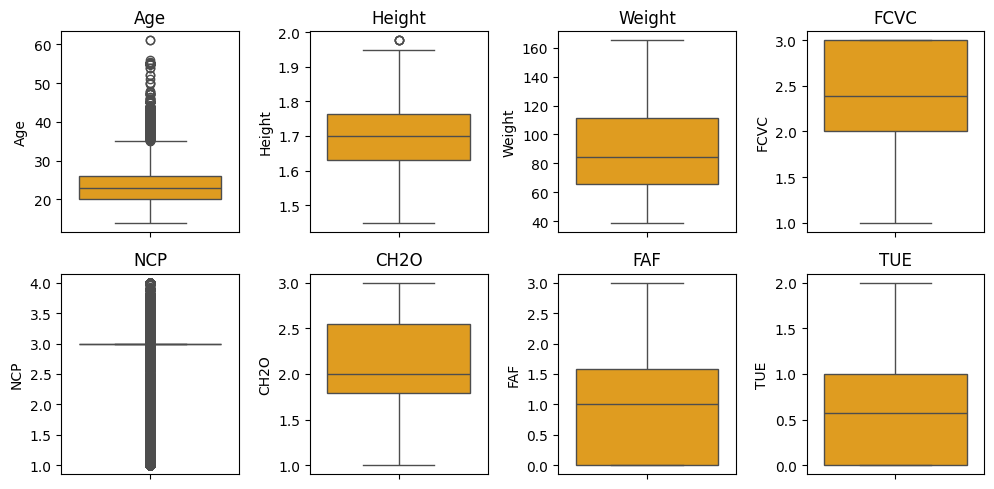

In [323]:
num = x.select_dtypes('number')

fig, axes = plt.subplots(2, 4, figsize=(10, 5))

# Flatten the axes array for easy iteration, and avoid making nested loop.
axes = axes.flatten()

# Plot boxplots for each feature
for i, column in enumerate(num.columns):
    sns.boxplot(num[column], ax = axes[i], color ='orange')
    axes[i].set_title(column)

# Adjust layout
plt.tight_layout()
plt.show();

In [324]:
#Check for extreme outliers
Q1 = num.quantile(0.25)
Q3 = num.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

outliers_mask = (num < lower_bound) | (num > upper_bound)

outlier_counts = outliers_mask.sum(axis=0)

total_rows = num.shape[0]
outlier_percentage = (outlier_counts / total_rows) * 100

outliers_summary = pd.DataFrame({
    "Number of Outliers": outlier_counts,
    "Outlier Percentage": outlier_percentage
})

outliers_summary.style.background_gradient(cmap='hot')

- `NCP` has many outliers,but many people have three meals, So it is really outliers? 🤔


In [325]:
#Check for NCP
x_train['NCP'].unique()

array([3.      , 1.134042, 3.471536, 2.326233, 1.      , 2.395785,
       1.496776, 1.355354, 4.      , 2.956422, 2.669766, 1.894384,
       2.581015, 2.9796  , 1.411685, 2.463113, 2.475228, 2.036794,
       2.141839, 2.973476, 2.983297, 2.845307, 1.672706, 3.884861,
       2.372339, 1.104642, 2.977909, 2.625942, 1.068196, 2.696051,
       3.715118, 2.993623, 2.029858, 2.358298, 2.989791, 1.134321,
       1.458507, 2.812283, 3.985442, 2.937607, 1.193589, 2.473911,
       2.954446, 1.07976 , 2.043359, 2.996834, 3.245148, 1.171027,
       1.288716, 1.194815, 2.083831, 2.608416, 3.03779 , 1.882158,
       1.773916, 3.762778, 2.884848, 1.355752, 2.967089, 3.371832,
       3.047959, 1.667596, 2.119682, 2.475444, 3.576103, 2.711238,
       2.122545, 2.996543, 1.273128, 1.818026, 1.717608, 2.977999,
       2.911568, 2.87747 , 2.13229 , 1.317884, 2.      , 2.271734,
       2.270546, 1.131695, 1.154318, 2.644692, 2.270163, 2.806566,
       3.45259 , 3.087544, 3.715148, 2.832018, 2.677693, 1.009

In [326]:
x_train['NCP']=np.round(x_train['NCP'])

In [327]:
x_train['NCP'].value_counts()

NCP
3.0    11395
1.0     1765
4.0      715
2.0      655
Name: count, dtype: int64

- Due to that there are 11395 belongs to 3 it looks every thing ather is outlier 👧

## -<u>`Insights`:</u>

### General Overview  
- The dataset contains **14,530 observations** and **16 variables**.  
- There are **no missing values** and **no duplicate rows**, ensuring data completeness and uniqueness.   
- Variable types include **4 categorical**, **8 numeric**, and **4 boolean** variables.  

### Data Quality & Issues  
#### 1. ** Missing data Issues:**
- No missing values across all columns.
#### 2. **  Imbalance Issues:**
- Most individuals consume high-calorie food frequently .
- Only 1.1% of respondents smoke (SMOKE), possibly indicating underreporting.
- SCC (Caloric Consumption Monitoring) is marked True in only 3.3% of cases, making it difficult to analyze.
#### 3. **Potential Data Entry Issues:**  
- **"Age"** has a minimum value of **14**, which may indicate the inclusion of underage individuals.  
- **"Weight"** ranges from **39 kg to 165.06 kg**, with some high values that may need verification.  
- **"Height"** ranges from **1.45 m to 1.98 m**, which appears reasonable but should be checked for outliers.  

### Observations :
- The dataset is **almost equally split** between genders (**Female, Male**).  
- **Mode of transportation** is dominated by **Public Transport **, followed by **Automobiles **.  
- **Food consumption between meals** is mostly reported as **"Sometimes" **.  

#### **Skewness & Distribution Analysis**  

- **Age distribution is right-skewed**, meaning there are more younger individuals and fewer older ones.  
- **Height appears normally distributed**, as expected in human populations.  
- **Weight is right-skewed**, indicating fewer individuals with very high weight.  
- **Vegetable consumption (FCVC) and water intake (CH2O) are left-skewed**, suggesting most people consume adequate amounts.  

---


### <u>Bivariate Data Visualizations :</u>

In [328]:
y_train.value_counts()

NObeyesdad
Obesity_Type_III       2838
Obesity_Type_II        2268
Normal_Weight          2152
Obesity_Type_I         2043
Overweight_Level_II    1753
Insufficient_Weight    1749
Overweight_Level_I     1727
Name: count, dtype: int64

`#` Numerical:

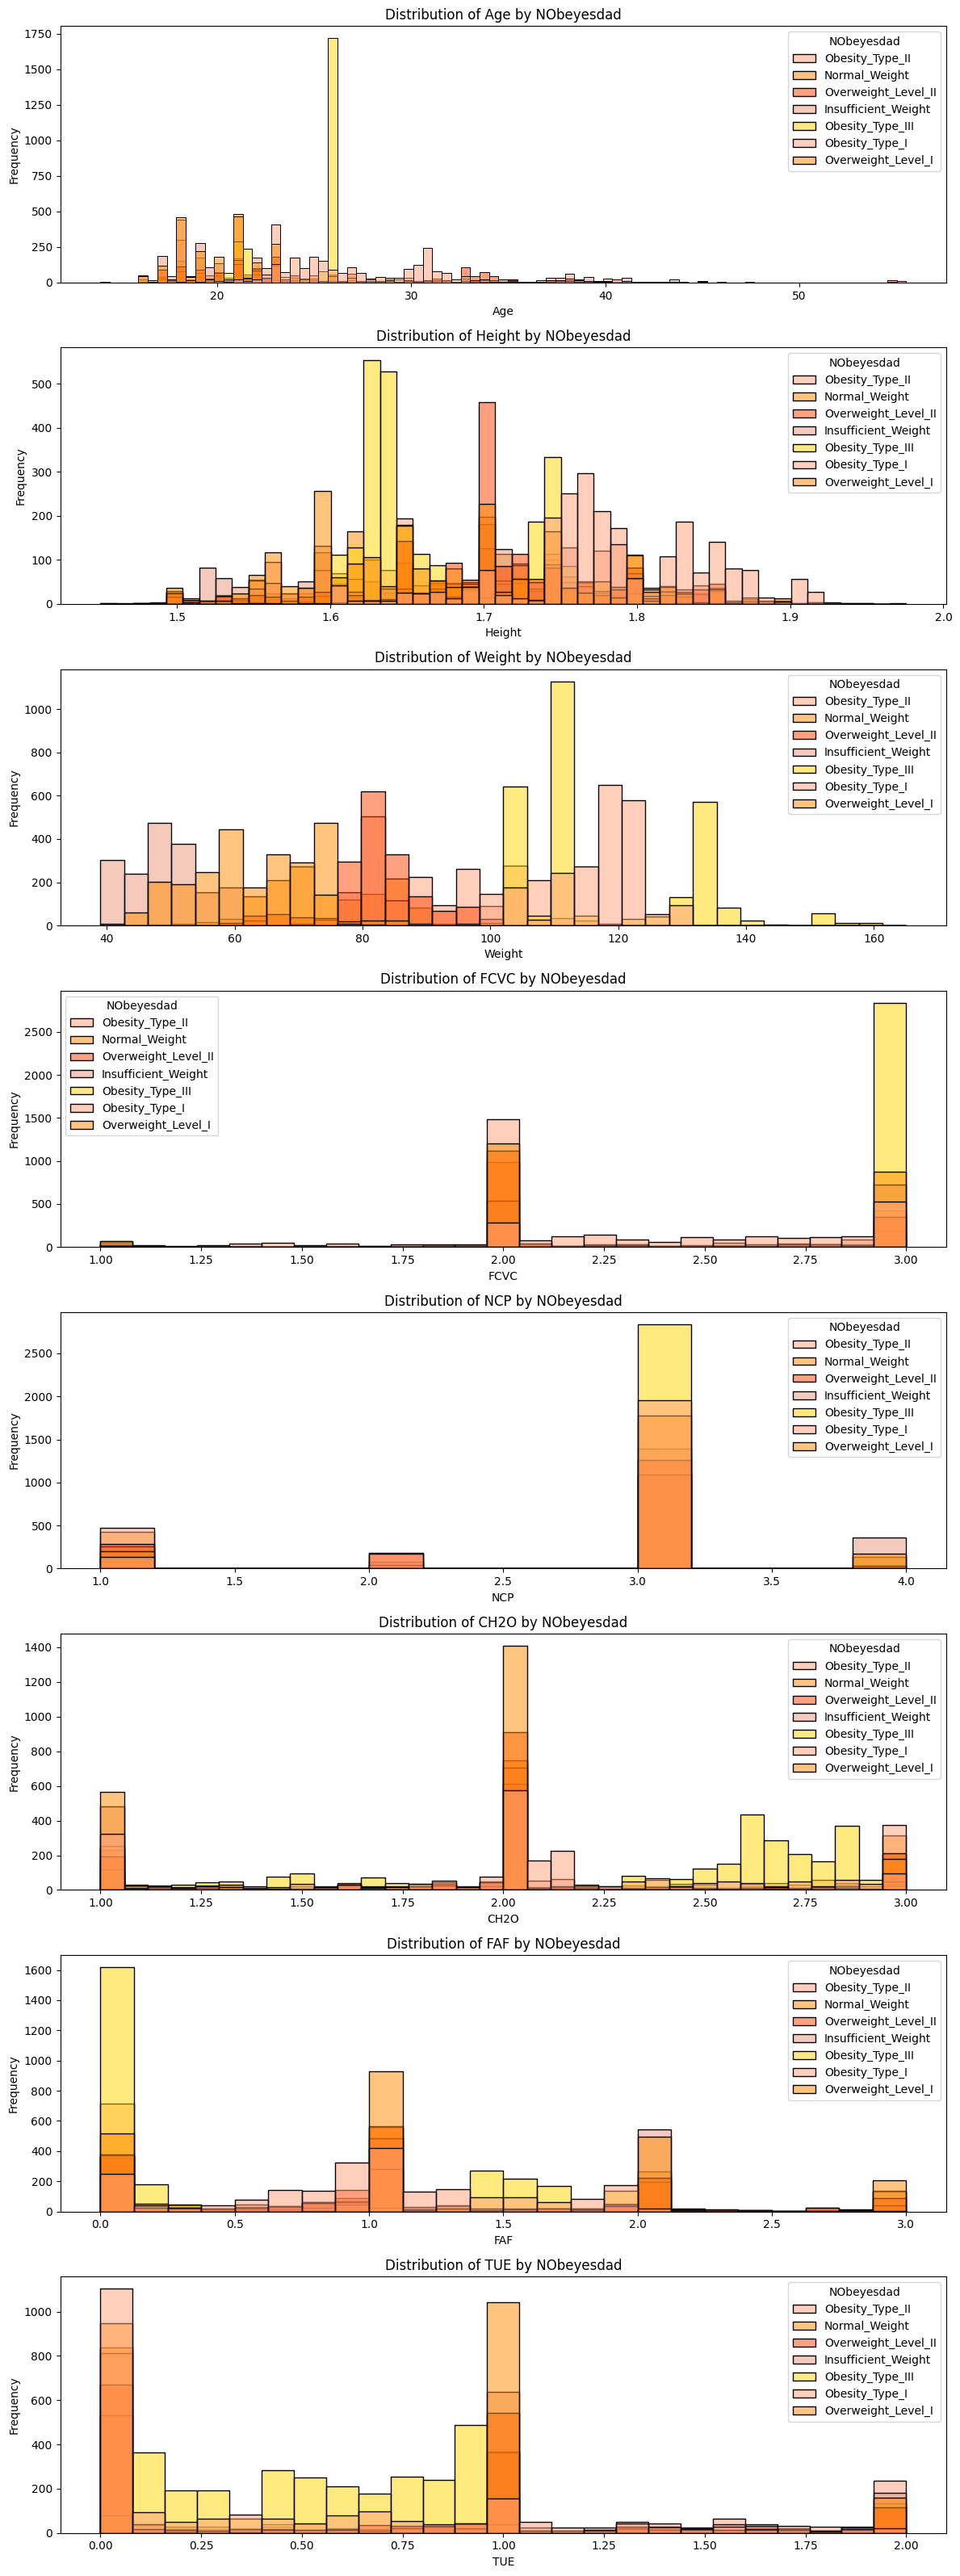

In [329]:
numerical_columns = x_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
target = y_train

colors = ["#FFA07A", "#FF8C00", "#FF4500", "#E9967A", "#FFD700"]

plt.figure(figsize=(12, len(numerical_columns) * 4))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.histplot(x=x_train[col], hue=target, palette=colors)
    plt.title(f"Distribution of {col} by {target.name}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

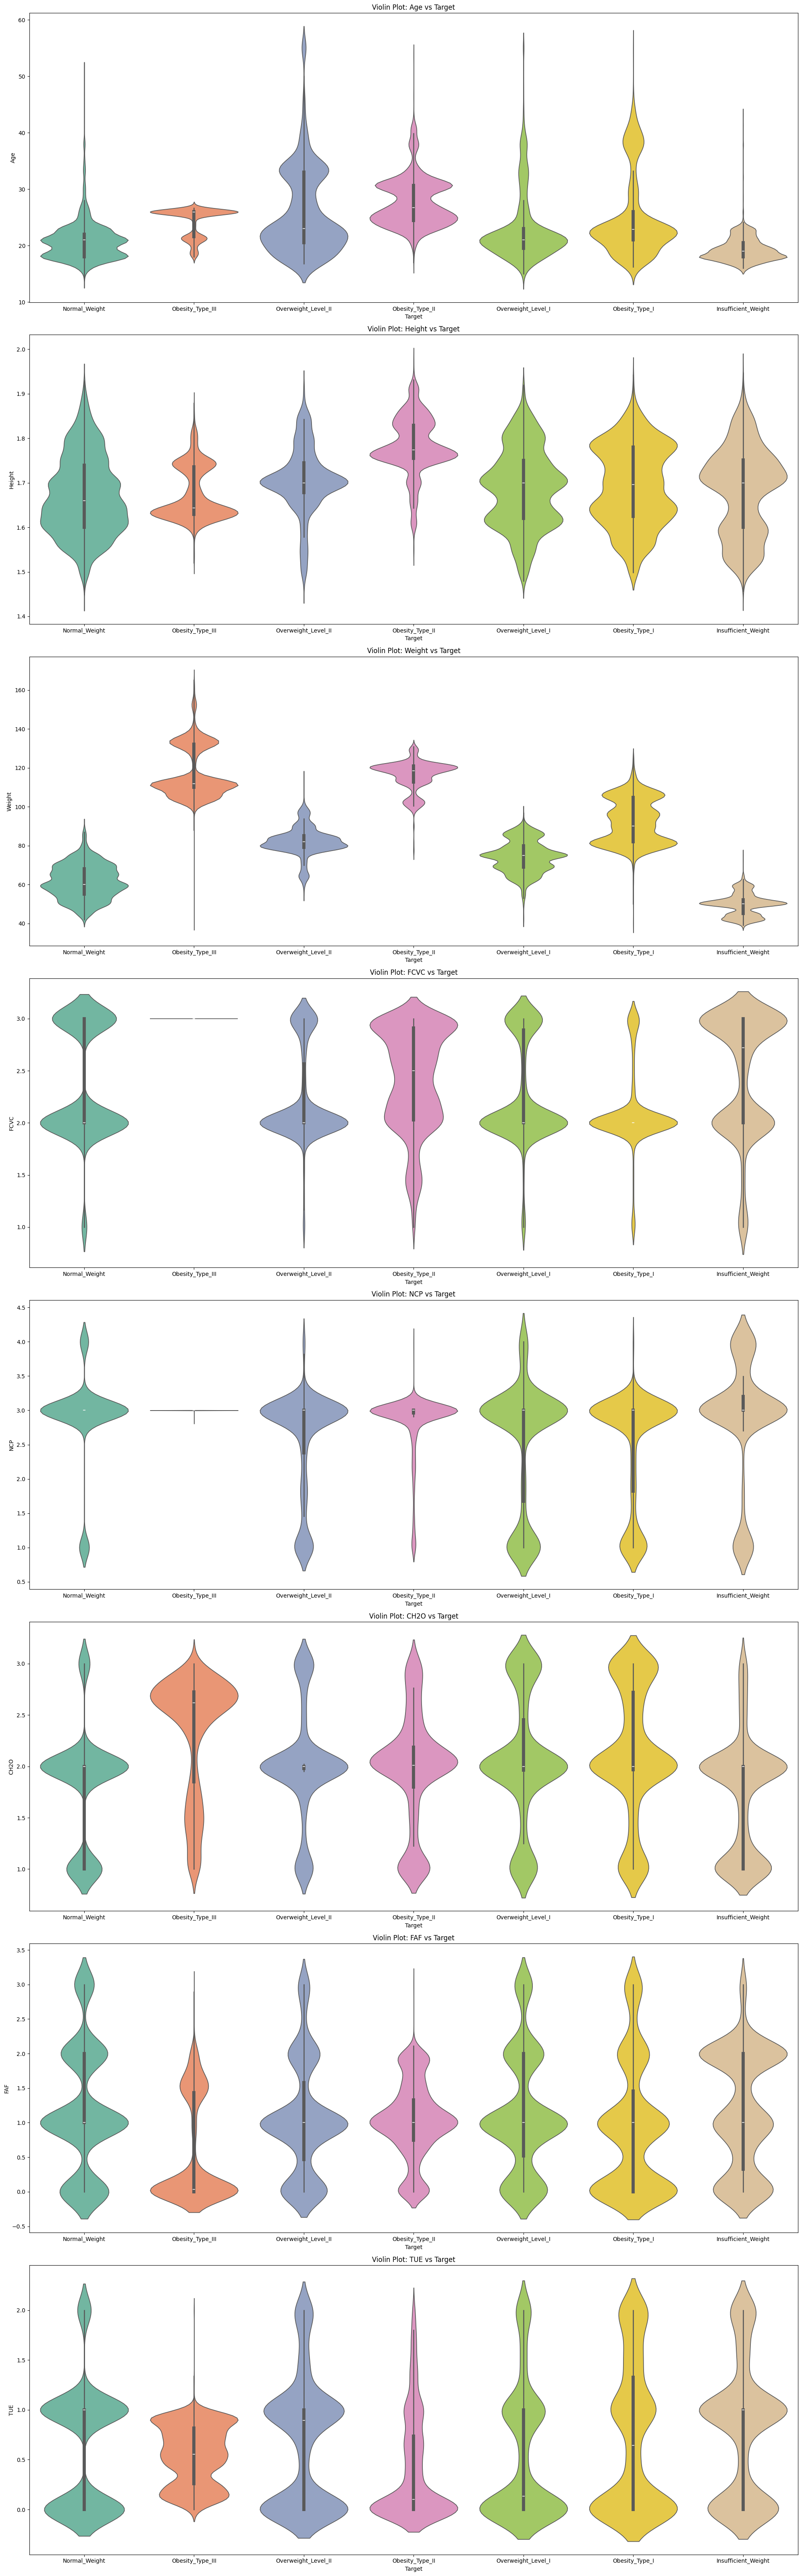

In [330]:
plt.figure(figsize=(20, 8 * len(num.columns)))
for i, col in enumerate(num.columns, 1):
    plt.subplot(len(num.columns), 1, i)
    sns.violinplot(x=y_train, y=num[col], palette='Set2')
    plt.title(f'Violin Plot: {col} vs Target')
    plt.xlabel('Target')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

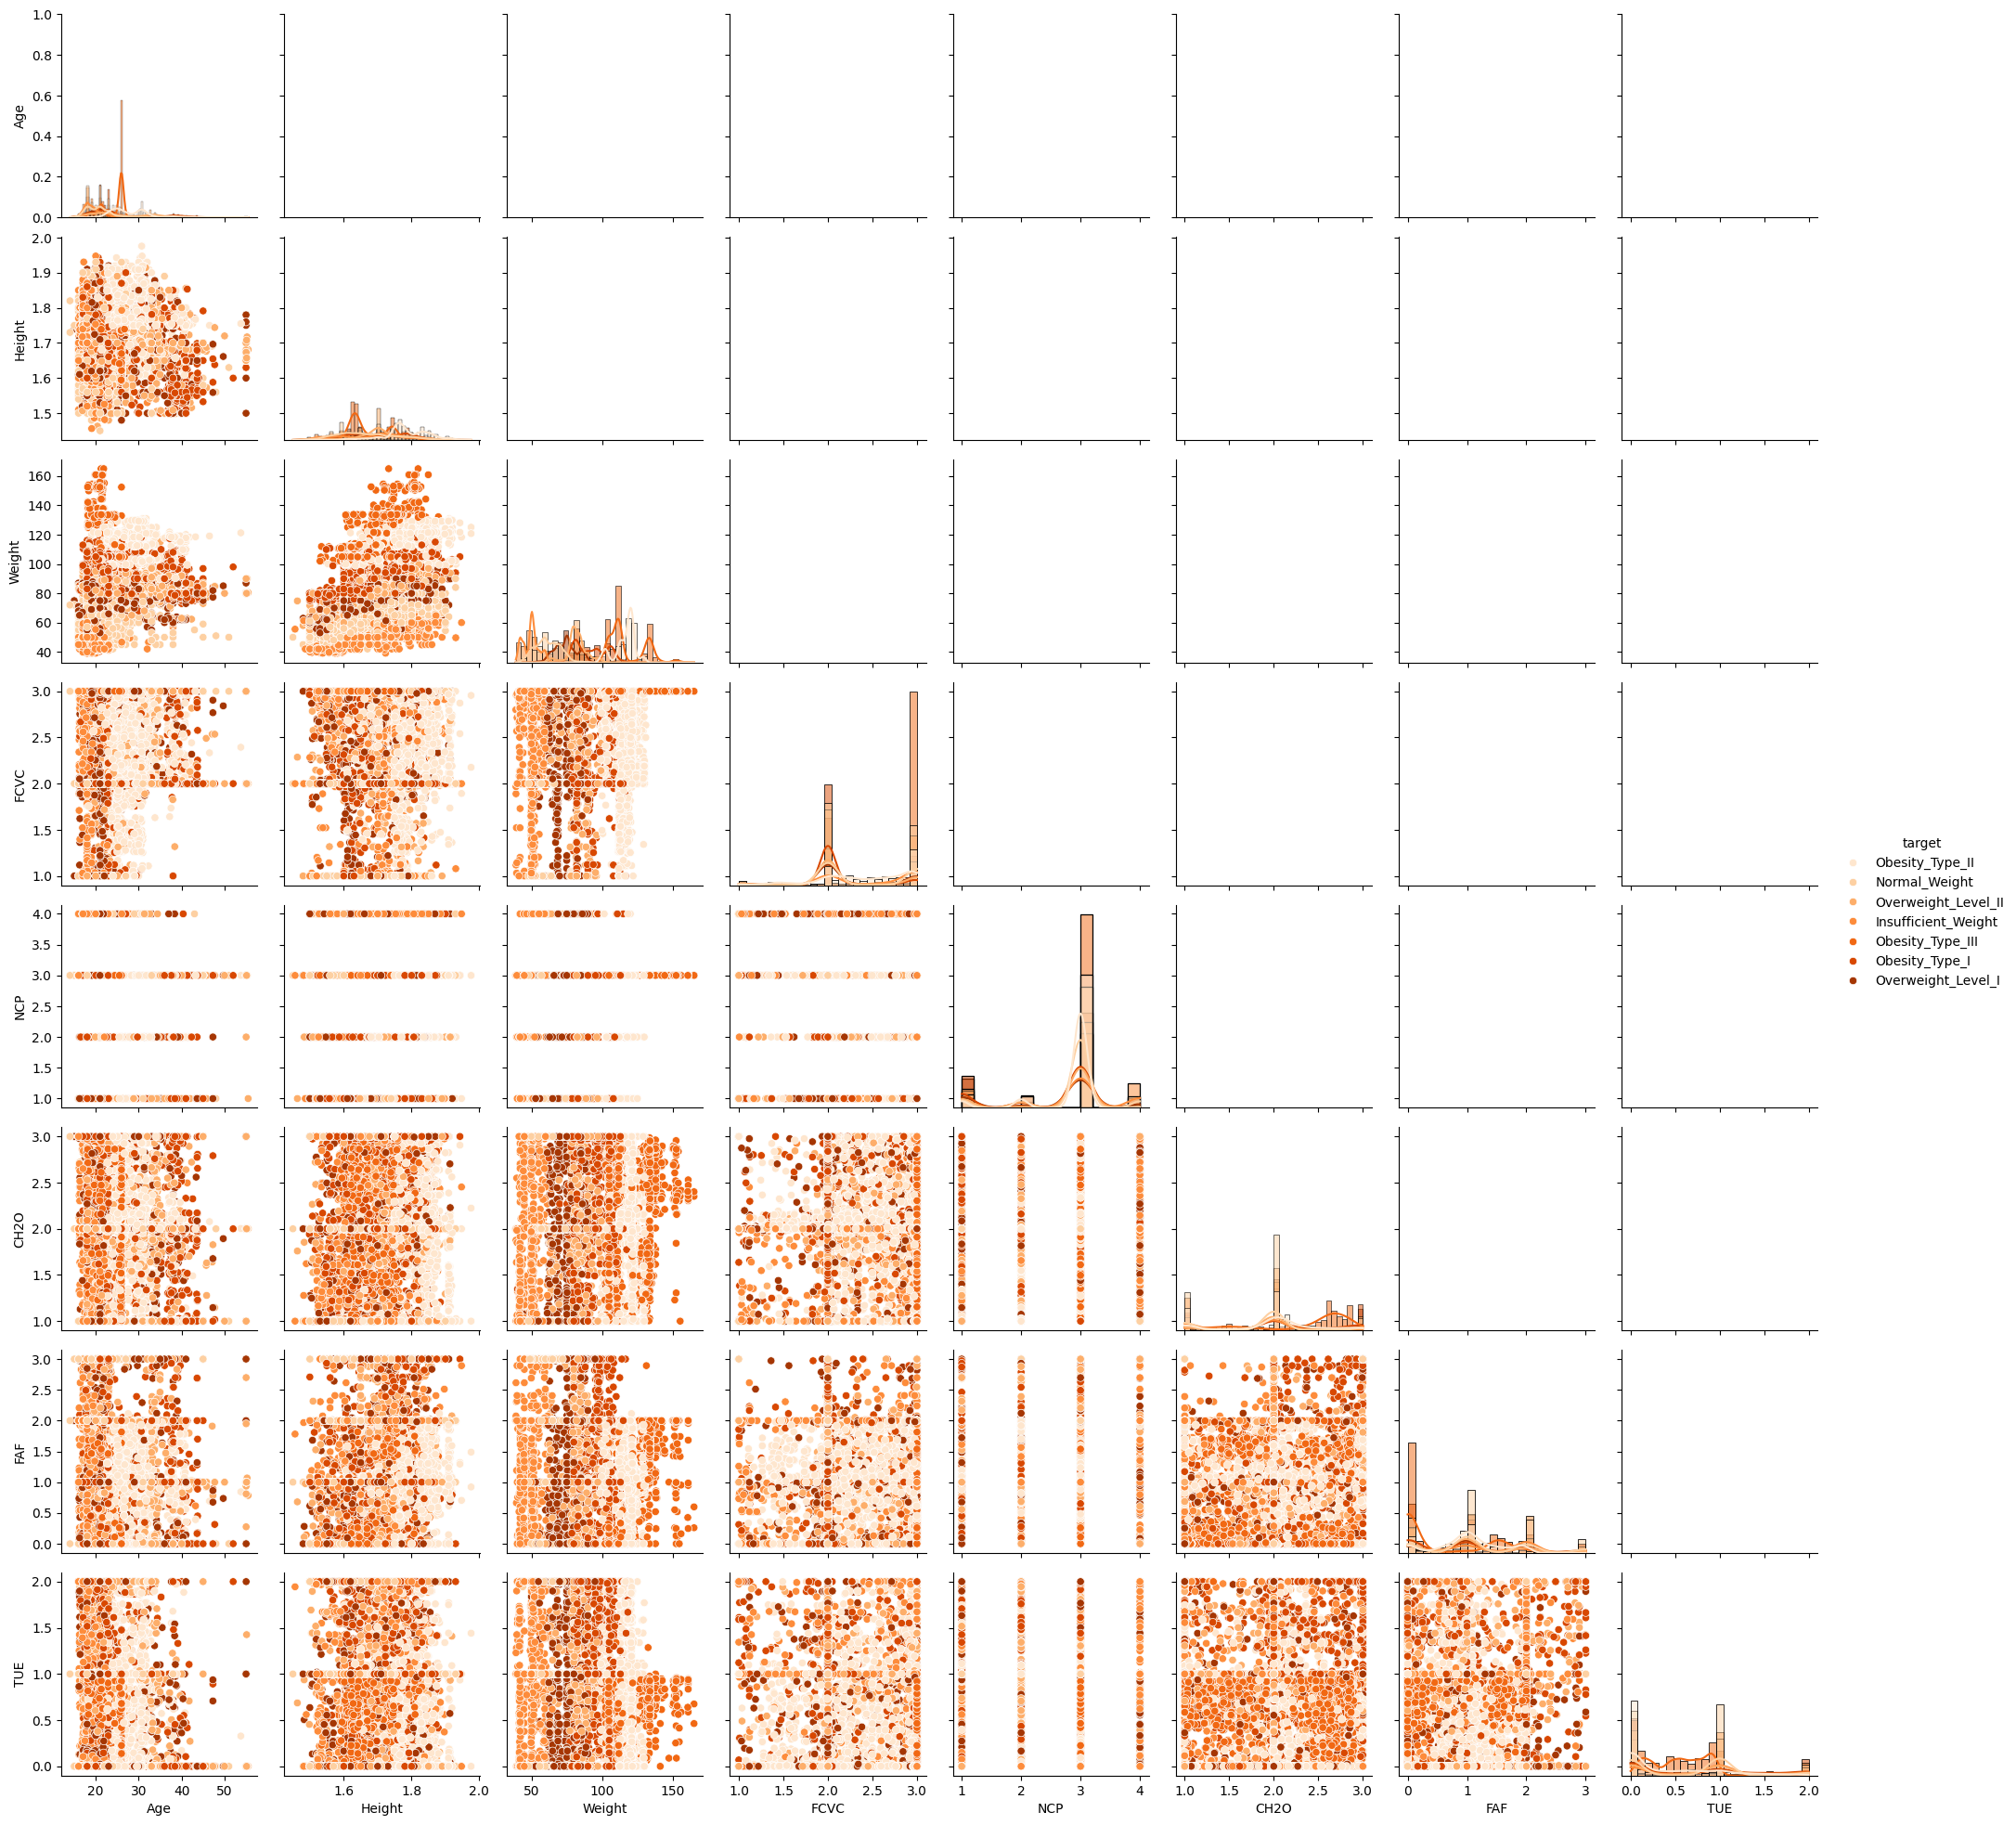

In [331]:
plot = sns.PairGrid(x_train.assign(target=y_train), vars=numerical_columns, hue='target', palette="Oranges")
plot.map_lower(sns.scatterplot)
plot.map_diag(sns.histplot,kde=True)
plot.add_legend()

plt.show()

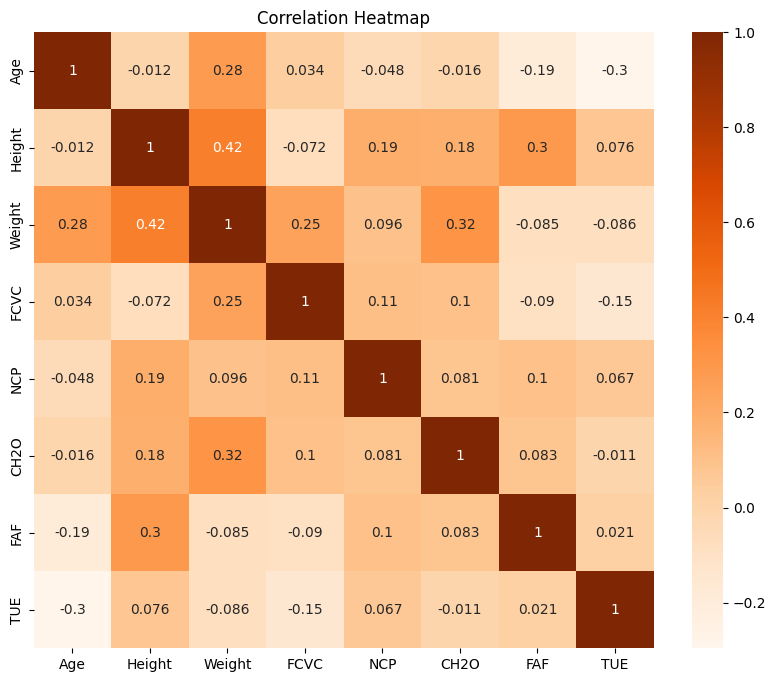

In [332]:
correlation = num.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='Oranges')
plt.title('Correlation Heatmap')
plt.show();


- There is no storng correlation between columns.

`#` Categorical:

In [333]:
categrical = x_train.select_dtypes('object')

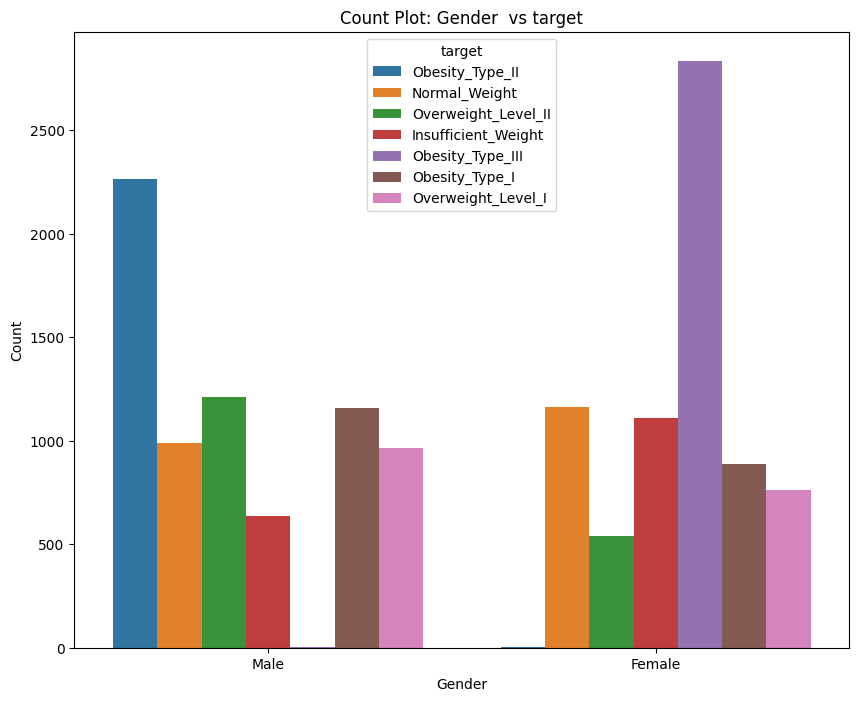

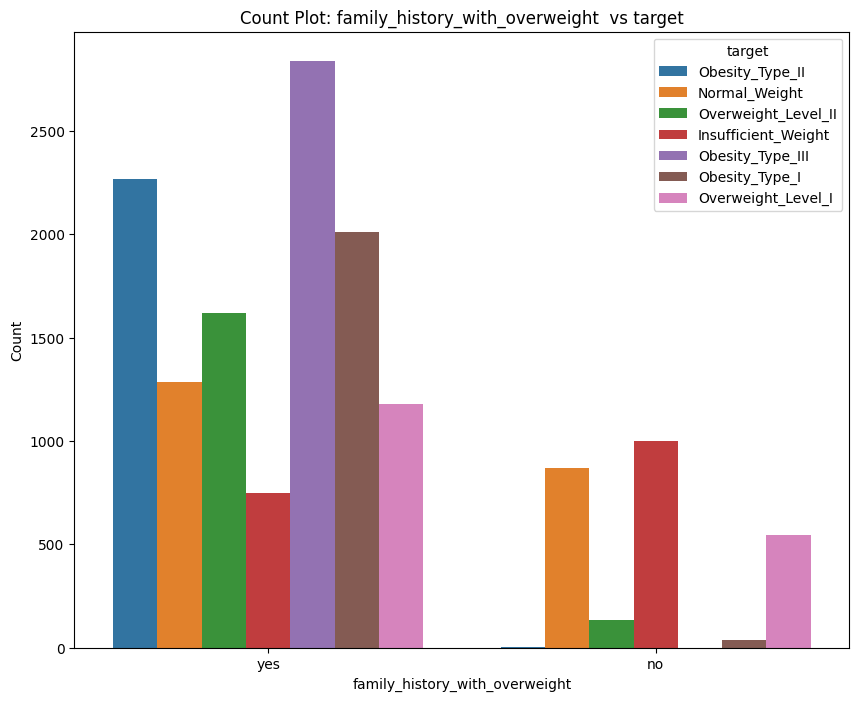

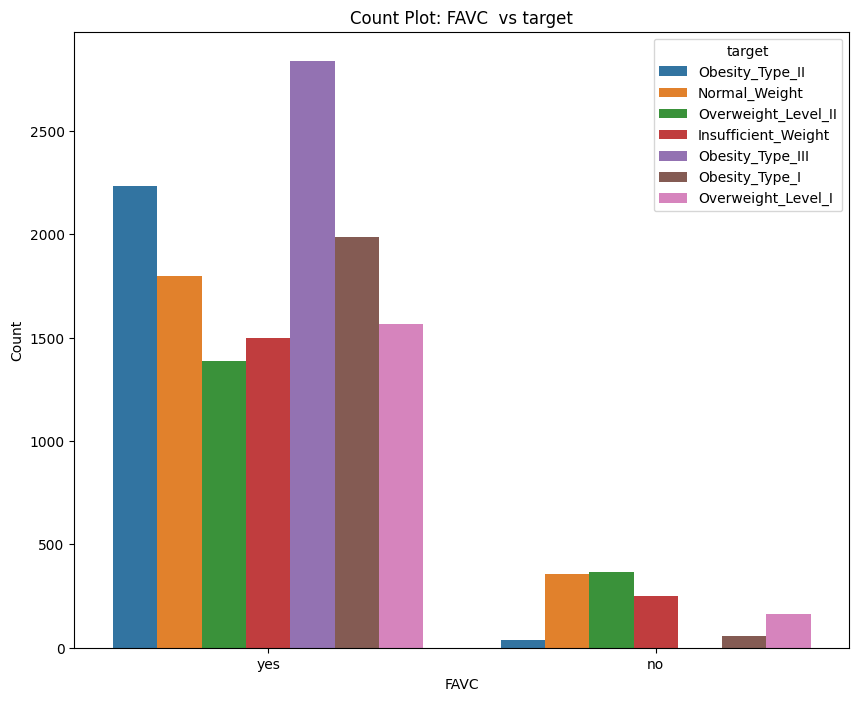

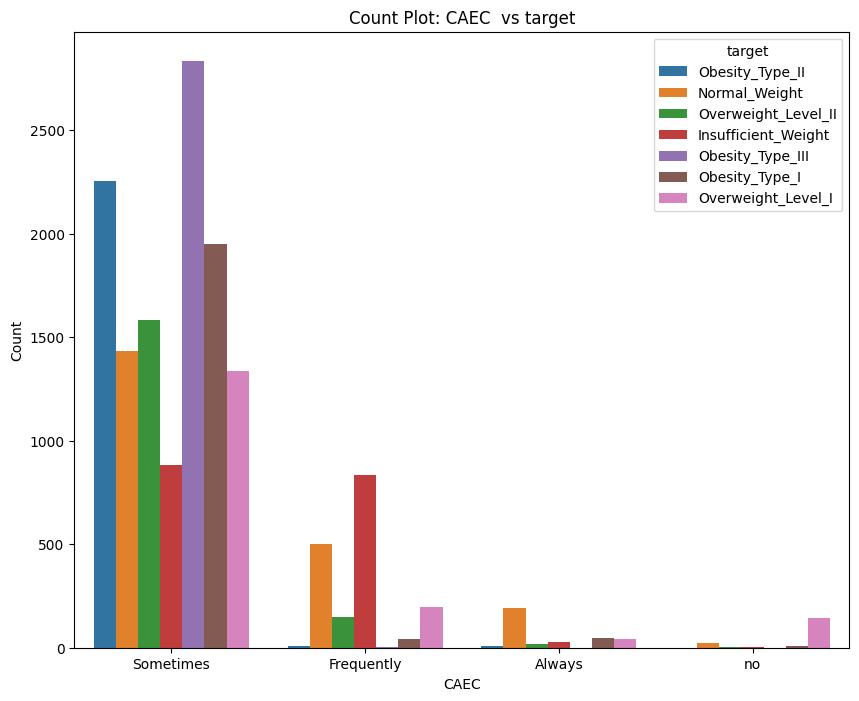

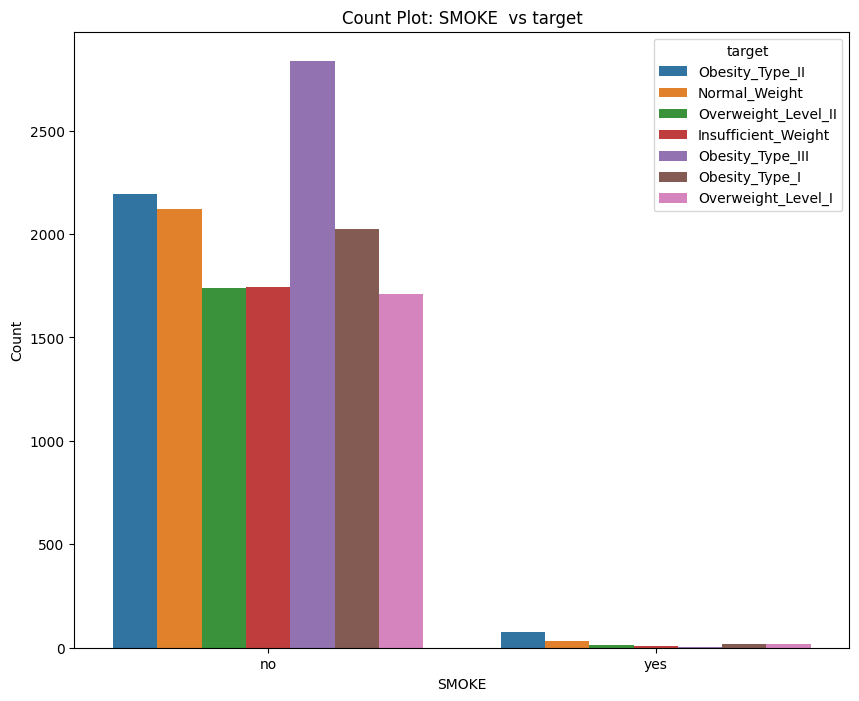

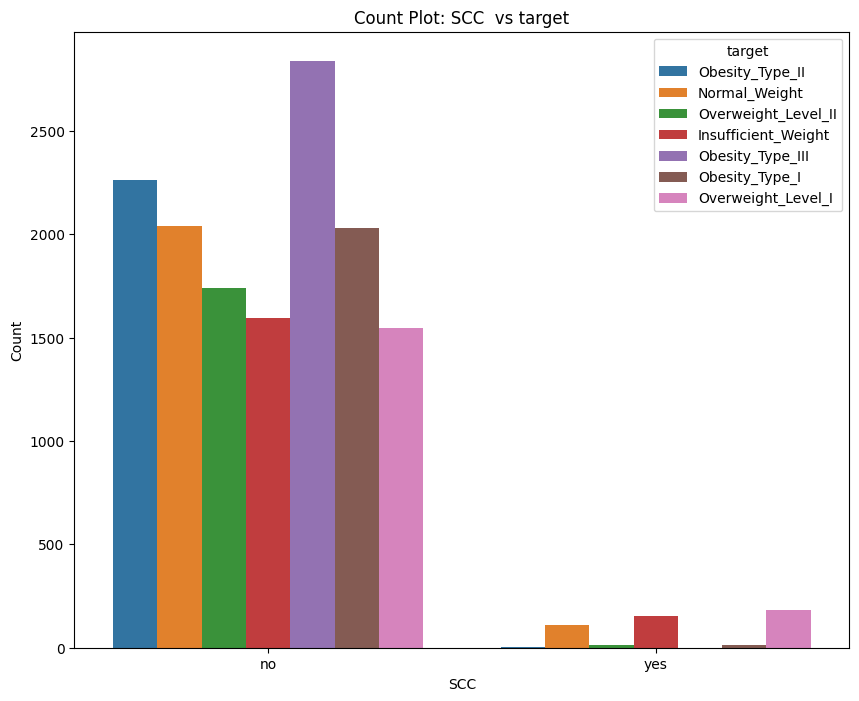

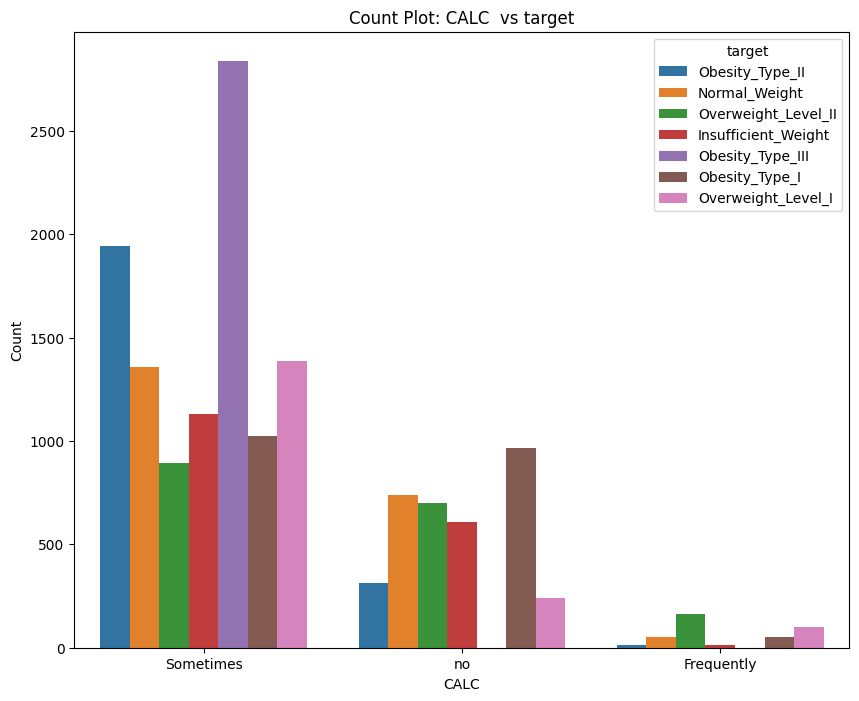

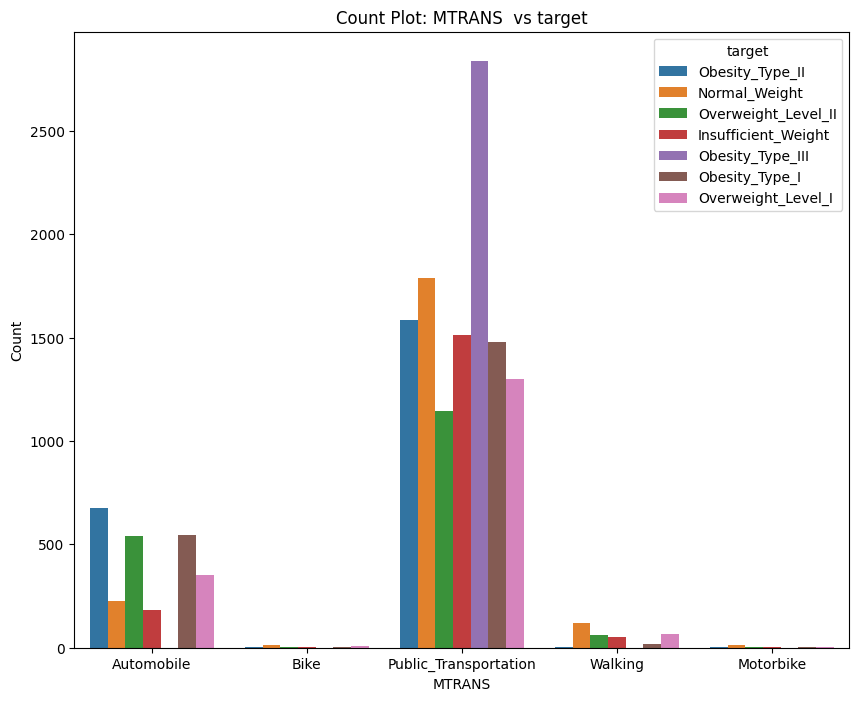

In [334]:
for i in categrical.columns:
  plt.figure(figsize=(10, 8))
  sns.countplot(x=x_train[i], hue= y_train)
  plt.title(f'Count Plot: {i}  vs target')
  plt.xlabel(i)
  plt.ylabel('Count')
  plt.legend(title='target')
  plt.show();

----------------

# `06` Data Preparation

## `i` Feature Engineering

In [335]:
#for df in [x_train]:
 #   x_train['BMI'] = x_train['Weight']/x_train['Height']**2

In [336]:
#x_train.drop(columns=['Weight','Height'],inplace=True)

In [337]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14530 entries, 3969 to 10741
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          14530 non-null  object 
 1   Age                             14530 non-null  float64
 2   Height                          14530 non-null  float64
 3   Weight                          14530 non-null  float64
 4   family_history_with_overweight  14530 non-null  object 
 5   FAVC                            14530 non-null  object 
 6   FCVC                            14530 non-null  float64
 7   NCP                             14530 non-null  float64
 8   CAEC                            14530 non-null  object 
 9   SMOKE                           14530 non-null  object 
 10  CH2O                            14530 non-null  float64
 11  SCC                             14530 non-null  object 
 12  FAF                             14

In [338]:
#sns.histplot(data = x_train , x= 'BMI' , kde=True , color = 'orange' )
#plt.show();

## `ii` Data Cleaning

In [339]:
# Do not forget to ensure that each column is deeply cleaned.

## `iii` Encoding

In [340]:
### encoding for x_train data
category = [['no','Sometimes','Frequently','Always']]
encoder_CAEC = OrdinalEncoder(categories=category)
x_train['CAEC'] = encoder_CAEC.fit_transform(x_train[['CAEC']])


category =[['Walking' ,'Bike','Motorbike','Public_Transportation','Automobile']]
encoder_MTRANS = OrdinalEncoder(categories=category)
x_train['MTRANS']=encoder_MTRANS.fit_transform(x_train[['MTRANS']])


category =[['no','yes']]
encoder_history = OrdinalEncoder(categories=category)
x_train['family_history_with_overweight'] = encoder_history.fit_transform(x_train[['family_history_with_overweight']])


### encoder for gender column
label = LabelEncoder()
x_train['Gender'] = label.fit_transform(x_train['Gender'])

### encoder CALC
category = [['no','Sometimes','Frequently','Always']]
ordinal_CALC = OrdinalEncoder(categories=category)
x_train['CALC'] = ordinal_CALC.fit_transform(x_train[['CALC']])
## encoder for FAVC
label_FAVC = LabelEncoder()
x_train['FAVC'] = label_FAVC.fit_transform(x_train['FAVC'])

## encoder SCC
label_SCC = LabelEncoder()
x_train['SCC'] = label_SCC.fit_transform(x_train['SCC'])


## encoder for smoke
label_smoke = LabelEncoder()
x_train['SMOKE'] = label_smoke.fit_transform(x_train['SMOKE'])

In [341]:
### encoding for y_train
category = [['Insufficient_Weight','Normal_Weight','Overweight_Level_I', 'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III']]
encoder = OrdinalEncoder(categories=category)
y_train_df = y_train.to_frame()
y_train = encoder.fit_transform(y_train_df)

In [342]:
def data_preprocessing(x_test,y_test):
  #x_test['BMI'] = x_test['Weight']/x_test['Height']**2
  #x_test.drop(columns=['Weight','Height'],inplace=True)
  x_test['NCP'] = np.round(x_test['NCP'])
  x_test['CAEC'] = encoder_CAEC.transform(x_test[['CAEC']]) ##CAEC
  x_test['MTRANS']=encoder_MTRANS.transform(x_test[['MTRANS']])
  x_test['family_history_with_overweight'] = encoder_history.transform(x_test[['family_history_with_overweight']])
  x_test['Gender'] = label.transform(x_test['Gender'])
  x_test['CALC'] = ordinal_CALC.transform(x_test[['CALC']])
  x_test['FAVC'] = label_FAVC.transform(x_test['FAVC'])
  x_test['SCC'] = label_SCC.transform(x_test['SCC'])
  x_test['SMOKE'] = label_smoke.transform(x_test['SMOKE'])
  y_test_df = y_test.to_frame()
  y_test = encoder.transform(y_test_df)

  return x_test,y_test


In [343]:
### apply preprocessing on test data
X_test,Y_test = data_preprocessing(x_test,y_test)

### apply preprocessing on validation data
X_valid ,Y_valid = data_preprocessing(x_valid,y_valid)

## ensamble model

In [344]:
from sklearn.ensemble import BaggingClassifier , VotingClassifier , RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

In [345]:
estimators = [
    ('logreg_default', LogisticRegression(random_state=42)),
    ('sgd_default', SGDClassifier(random_state=42)),
    ('dis_tree' , DecisionTreeClassifier(random_state=42)),
    ('logreg_l1', LogisticRegression(random_state=42, penalty='l1', solver='liblinear')),
    ('logreg_l2', LogisticRegression(random_state=42, penalty='l2', solver='liblinear')),
    ('logreg_none_newtoncg', LogisticRegression(random_state=42, penalty='l2', solver='newton-cg')),
    ('logreg_none_lbfgs', LogisticRegression(random_state=42, solver='lbfgs')),
    ('logreg_none_sag', LogisticRegression(random_state=42, solver='sag')),
    ('sgd_hinge2', SGDClassifier(random_state=42, loss='hinge')),
    ('logreg_none_sag1', LogisticRegression(random_state=42, solver='sag',penalty='l2')),
    ('sgd_hinge', SGDClassifier(random_state=42, loss='hinge')),
    ('sgd_log', SGDClassifier(random_state=42, loss='squared_error')),
    ('sgd_modified_huber', SGDClassifier(random_state=42, loss='modified_huber')),
    ('sgd_squared_hinge', SGDClassifier(random_state=42, loss='squared_hinge')),
    ('sgd_perceptron', SGDClassifier(random_state=42, loss='perceptron')),
    ('sgd_squared_loss', SGDClassifier(random_state=42, loss='squared_error')),  # Changed loss to 'squared_error'
    ('sgd_huber', SGDClassifier(random_state=42, loss='huber')),
    ('dtree_gini', DecisionTreeClassifier(random_state=42, criterion='gini' , max_depth= 3 , min_weight_fraction_leaf= 0.4)),
    ('dtree_entropy', DecisionTreeClassifier(random_state=42, criterion='entropy' , max_depth=4)),
    ('dtree_DecisionTlog_loss' ,DecisionTreeClassifier(random_state=42, criterion='log_loss' , max_depth= 8 , min_samples_leaf= 10 , min_weight_fraction_leaf= 0.2)),
    ('dtree_squared_error', DecisionTreeClassifier(random_state=42, criterion='gini',max_depth=6 , min_samples_split= 40 , max_leaf_nodes=3 ))
]

In [346]:
voting_classifier = VotingClassifier(estimators=estimators, voting='hard')

In [347]:
voting_classifier.fit(x_train, y_train)

VotingClassifier(estimators=[('logreg_default',
                              LogisticRegression(random_state=42)),
                             ('sgd_default', SGDClassifier(random_state=42)),
                             ('dis_tree',
                              DecisionTreeClassifier(random_state=42)),
                             ('logreg_l1',
                              LogisticRegression(penalty='l1', random_state=42,
                                                 solver='liblinear')),
                             ('logreg_l2',
                              LogisticRegression(random_state=42,
                                                 solver='liblinear')),
                             ('logreg_none_n...
                             ('dtree_entropy',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=4,
                                                     random_state=42)),
                             ('dtree_DecisionTlog_loss',
                              DecisionTreeClassifier(criterion='log_loss',
                                                     max_depth=8,
                                                     min_samples_leaf=10,
                                                     min_weight_fraction_leaf=0.2,
                                                     random_state=42)),
                             ('dtree_squared_error',
                              DecisionTreeClassifier(max_depth=6,
                                                     max_leaf_nodes=3,
                                                     min_samples_split=40,
                                                     random_state=42))])

In [348]:
y_pred = voting_classifier.predict(X_valid)

In [349]:
from sklearn.metrics import classification_report

In [350]:
classification_report = classification_report(Y_valid, y_pred)
print(classification_report)

              precision    recall  f1-score   support

         0.0       0.88      0.87      0.88       395
         1.0       0.72      0.76      0.74       468
         2.0       0.58      0.63      0.60       336
         3.0       0.71      0.52      0.60       391
         4.0       0.75      0.70      0.72       430
         5.0       0.86      0.98      0.92       493
         6.0       0.98      1.00      0.99       601

    accuracy                           0.80      3114
   macro avg       0.78      0.78      0.78      3114
weighted avg       0.80      0.80      0.80      3114



In [351]:
score = voting_classifier.score(x_train,y_train)
print(score)

0.7931865106675843


##bagging model

In [352]:
model_base = LogisticRegression(random_state=42)
bagging_classifier = BaggingClassifier(estimator= model_base , n_estimators=100, random_state=42)

In [353]:
bagging_classifier.fit(x_train, y_train)

BaggingClassifier(estimator=LogisticRegression(random_state=42),
                  n_estimators=100, random_state=42)

In [354]:
y_pred_bagging = bagging_classifier.predict(X_valid)

In [355]:
from sklearn.metrics import classification_report

In [356]:
classification_report = classification_report(Y_valid, y_pred_bagging)
print(classification_report)

              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82       395
         1.0       0.65      0.67      0.66       468
         2.0       0.51      0.50      0.51       336
         3.0       0.61      0.43      0.51       391
         4.0       0.56      0.57      0.57       430
         5.0       0.81      0.87      0.84       493
         6.0       0.92      0.99      0.95       601

    accuracy                           0.72      3114
   macro avg       0.70      0.70      0.69      3114
weighted avg       0.71      0.72      0.72      3114



##voting2

In [357]:
from sklearn.preprocessing import StandardScaler
scale_age = StandardScaler()
x_train['Age'] = scale_age.fit_transform(x_train[['Age']])
X_valid['Age'] = scale_age.transform(X_valid[['Age']])

In [358]:
estimators = [
    ('logreg_default', LogisticRegression(random_state=42)),
    ('sgd_default', SGDClassifier(random_state=42)),
    ('dis_tree' , DecisionTreeClassifier(random_state=42,max_depth= 6)),
]

In [359]:
voting_classifier2 = VotingClassifier(estimators=estimators, voting='hard')

In [360]:
voting_classifier2.fit(x_train, y_train)

VotingClassifier(estimators=[('logreg_default',
                              LogisticRegression(random_state=42)),
                             ('sgd_default', SGDClassifier(random_state=42)),
                             ('dis_tree',
                              DecisionTreeClassifier(max_depth=6,
                                                     random_state=42))])

In [361]:
voting_classifier2.score(X_valid,Y_valid)

0.821451509312781

##logistic

In [362]:
model_logistic = LogisticRegression(random_state=42 , )
model_logistic.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [363]:
model_logistic.score(X_valid,Y_valid)

0.7581888246628131

In [364]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [365]:
param_grid = {
    'n_estimators': [800],
    'learning_rate': [0.05],
    'max_depth': [2,3],
    'min_child_weight': [4]
}

xgb_model = xgb.XGBClassifier()

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=10, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 800}
Best Score: 0.9038540949759118
